# Reading In Data File

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import pylab as py
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("ds_salaries.csv")

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
df.loc[df["job_title"] == "ML Engineer", "job_title"] = "Machine Learning Engineer"

In [6]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Exploratory Data Analysis -- Graphs

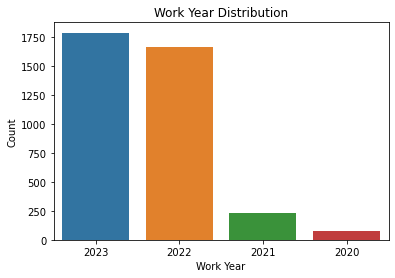

In [7]:
sns.countplot(x = "work_year", data = df, order = df["work_year"].value_counts().index)
plt.xlabel("Work Year")
plt.ylabel("Count")
plt.title("Work Year Distribution")
plt.show()

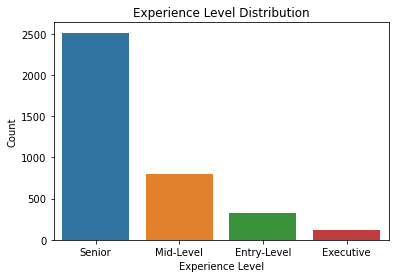

In [8]:
sns.countplot(x = "experience_level", data = df, order = df["experience_level"].value_counts().index)
plt.xticks(range(4), ["Senior", "Mid-Level", "Entry-Level", "Executive"])
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.title("Experience Level Distribution")
plt.show()

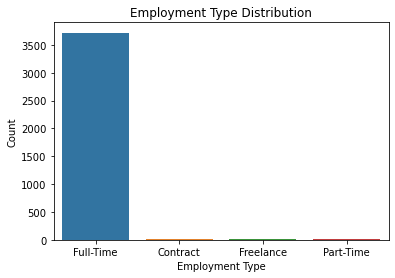

In [9]:
sns.countplot(x = "employment_type", data = df, order = df["employment_type"].value_counts().index)
plt.xticks(range(4), ["Full-Time", "Contract", "Freelance", "Part-Time"])
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.title("Employment Type Distribution")
plt.show()

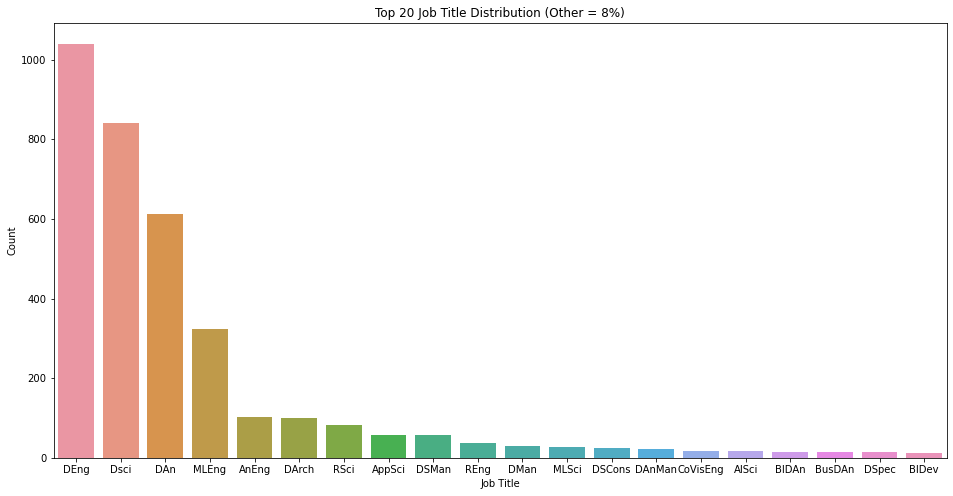

In [10]:
plt.figure(figsize=(16,8)) 
sns.countplot(x = "job_title", data = df, order = df["job_title"].value_counts()[:20].index)
plt.xticks(range(20), ["DEng", "Dsci", "DAn", "MLEng", "AnEng", "DArch", "RSci", "AppSci", "DSMan", "REng", "DMan", 
                       "MLSci", "DSCons", "DAnMan", "CoVisEng", "AISci", "BIDAn", 
                       "BusDAn", "DSpec", "BIDev"])
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.title("Top 20 Job Title Distribution (Other = 8%)")
plt.show()

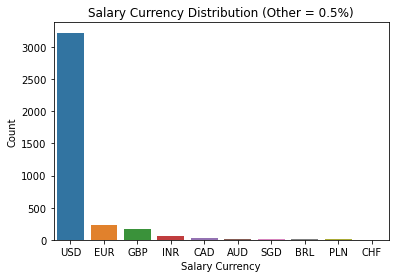

In [11]:
sns.countplot(x = "salary_currency", data = df, order = df["salary_currency"].value_counts()[:10].index)
plt.xlabel("Salary Currency")
plt.ylabel("Count")
plt.title("Salary Currency Distribution (Other = 0.5%)")
plt.show()

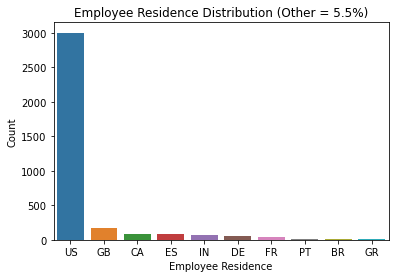

In [13]:
sns.countplot(x = "employee_residence", data = df, order = df["employee_residence"].value_counts()[:10].index)
plt.xlabel("Employee Residence")
plt.ylabel("Count")
plt.title("Employee Residence Distribution (Other = 5.5%)")
plt.show()

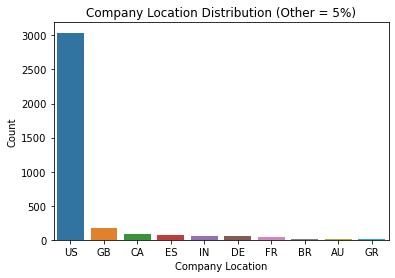

In [12]:
sns.countplot(x = "company_location", data = df, order = df["company_location"].value_counts()[:10].index)
plt.xlabel("Company Location")
plt.ylabel("Count")
plt.title("Company Location Distribution (Other = 5%)")
plt.show()

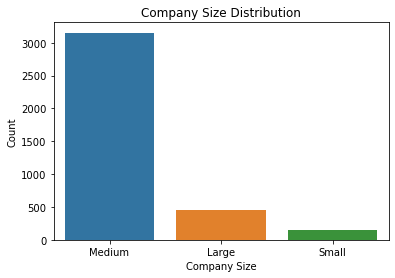

In [14]:
sns.countplot(x = "company_size", data = df, order = df["company_size"].value_counts().index)
plt.xticks(range(3), ["Medium", "Large", "Small"])
plt.xlabel("Company Size")
plt.ylabel("Count")
plt.title("Company Size Distribution")
plt.show()

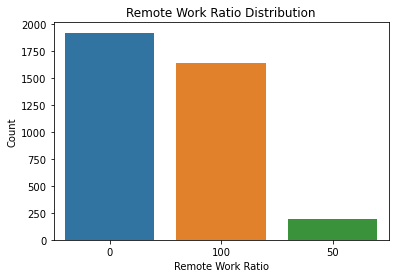

In [15]:
sns.countplot(x = "remote_ratio", data = df, order = df["remote_ratio"].value_counts().index)
#plt.xticks(range(3), ["In Person", "Fully Remote", "Hybrid"])
plt.xlabel("Remote Work Ratio")
plt.ylabel("Count")
plt.title("Remote Work Ratio Distribution")
plt.show()

In [16]:
print("Salary Statistics\n" + "Mean: " + str(round(df["salary"].mean(), 2)) + "\n" + "Median: " + 
      str(round(df["salary"].median(), 2)) + "\n" + "Standard Deviation: " + str(round(df["salary"].std(), 2)) + "\n" + 
      "Min: " + str(df["salary"].min()) + "\n" + "Max: " + str(df["salary"].max()))

Salary Statistics
Mean: 190695.57
Median: 138000.0
Standard Deviation: 671676.5
Min: 6000
Max: 30400000


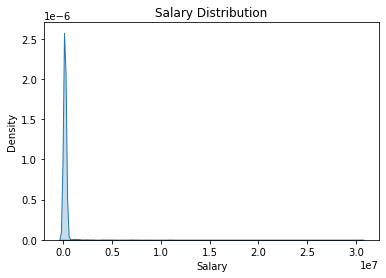

In [17]:
sns.kdeplot(data = df, x = df["salary"], fill = True)
plt.xlabel("Salary")
plt.title("Salary Distribution")
plt.show()

In [18]:
print("USD Salary Statistics\n" + "Mean: " + str(round(df["salary_in_usd"].mean(), 2)) + "\n" + "Median: " + 
      str(round(df["salary_in_usd"].median(), 2)) + "\n" + "Standard Deviation: " + 
      str(round(df["salary_in_usd"].std(), 2)) + "\n" + 
      "Min: " + str(df["salary_in_usd"].min()) + "\n" + "Max: " + str(df["salary_in_usd"].max()))

USD Salary Statistics
Mean: 137570.39
Median: 135000.0
Standard Deviation: 63055.63
Min: 5132
Max: 450000


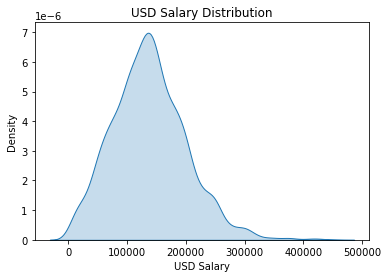

In [19]:
sns.kdeplot(data = df, x = df["salary_in_usd"], fill = True)
plt.xlabel("USD Salary")
plt.title("USD Salary Distribution")
plt.show()

# Keeping Most Common Values -- Assigning other values as "Other"

In [20]:
print((sum(df["job_title"].value_counts()[:20].tolist()) / len(df)) * 100)
print((sum(df["salary_currency"].value_counts()[:10].tolist()) / len(df)) * 100)
print((sum(df["employee_residence"].value_counts()[:10].tolist()) / len(df)) * 100)
print((sum(df["company_location"].value_counts()[:10].tolist()) / len(df)) * 100)

91.77097203728363
99.49400798934754
94.4074567243675
94.99334221038616


In [21]:
#job_title_list = list(df["job_title"].value_counts()[:15].index)
#currency_list = list(df["salary_currency"].value_counts()[:15].index)
#residence_list = list(df["employee_residence"].value_counts()[:15].index)
#company_location_list = list(df["company_location"].value_counts()[:15].index)

job_title_list = list(df["job_title"].value_counts()[:20].index)
currency_list = list(df["salary_currency"].value_counts()[:10].index)
residence_list = list(df["employee_residence"].value_counts()[:10].index)
company_location_list = list(df["company_location"].value_counts()[:10].index)

In [22]:
df.loc[df["job_title"].isin(job_title_list) == False, "job_title"] = "Other"
df.loc[df["salary_currency"].isin(currency_list) == False, "salary_currency"] = "Other"
df.loc[df["employee_residence"].isin(residence_list) == False, "employee_residence"] = "Other"
df.loc[df["company_location"].isin(company_location_list) == False, "company_location"] = "Other"

# Exploratory Data Analysis -- Group By

In [23]:
cat_cols = df[["work_year", "experience_level", "employment_type", "job_title", "salary_currency", "employee_residence",
               "remote_ratio", "company_location", "company_size"]]

for col in cat_cols:
    df[col] = df[col].astype("category")

In [24]:
round(df.groupby(["work_year"])["salary_in_usd"].mean().reset_index().sort_values("salary_in_usd", ascending = False), 2)

,work_year,salary_in_usd
3,2023,149045.54
2,2022,133338.62
1,2021,94087.21
0,2020,92302.63


In [25]:
round(df.groupby("experience_level")["salary_in_usd"].mean().reset_index().sort_values("salary_in_usd", ascending = False), 2)

,experience_level,salary_in_usd
1,EX,194930.93
3,SE,153051.07
2,MI,104525.94
0,EN,78546.28


In [26]:
round(df.groupby("employment_type")["salary_in_usd"].mean().reset_index().sort_values("salary_in_usd", ascending = False), 2)

,employment_type,salary_in_usd
2,FT,138314.20
0,CT,113446.90
1,FL,51807.80
3,PT,39533.71


In [27]:
round(df.groupby("job_title")["salary_in_usd"].mean().reset_index().sort_values("salary_in_usd", ascending = False), 2)

,job_title,salary_in_usd
13,Data Science Manager,191278.78
2,Applied Scientist,190264.48
17,Machine Learning Scientist,163220.08
19,Research Engineer,163108.38
9,Data Architect,161713.77
20,Research Scientist,161214.20
16,Machine Learning Engineer,155076.17
1,Analytics Engineer,152368.63
6,Computer Vision Engineer,143536.11
10,Data Engineer,142785.73


In [28]:
round(df.groupby("salary_currency")["salary_in_usd"].mean().reset_index().sort_values("salary_in_usd", ascending = False), 2)

,salary_currency,salary_in_usd
10,USD,149366.91
3,CHF,100682.00
2,CAD,96707.40
5,GBP,83850.23
9,SGD,81770.00
0,AUD,74198.44
4,EUR,62281.73
7,Other,55162.11
8,PLN,34165.20
6,INR,25785.30


In [29]:
round(df.groupby("employee_residence")["salary_in_usd"].mean().reset_index().sort_values("salary_in_usd", ascending = False), 2)

,employee_residence,salary_in_usd
10,US,152822.01
1,CA,132222.91
2,DE,94772.25
5,GB,86988.32
8,Other,70100.98
4,FR,61492.50
3,ES,60463.35
6,GR,55136.06
9,PT,53059.00
0,BR,48927.11


In [30]:
round(df.groupby("remote_ratio")["salary_in_usd"].mean().reset_index().sort_values("salary_in_usd", ascending = False), 2)

,remote_ratio,salary_in_usd
0,0,144316.20
2,100,136481.45
1,50,78400.69


In [31]:
round(df.groupby("company_location")["salary_in_usd"].mean().reset_index().sort_values("salary_in_usd", ascending = False), 2)

,company_location,salary_in_usd
10,US,151822.01
2,CA,131917.69
3,DE,88288.80
6,GB,86890.05
0,AU,80033.43
9,Other,67959.10
5,FR,66138.74
4,ES,57676.06
7,GR,51792.50
1,BR,40579.20


In [32]:
round(df.groupby("company_size")["salary_in_usd"].mean().reset_index().sort_values("salary_in_usd", ascending = False), 2)

,company_size,salary_in_usd
1,M,143130.55
0,L,118300.98
2,S,78226.68


# Data Preprocessing

## Encoding

In [32]:
#cat_cols = df[["work_year", "experience_level", "employment_type", "job_title", "salary_currency", "employee_residence",
#               "remote_ratio", "company_location", "company_size"]]

#for col in cat_cols:
#    df[col] = df[col].astype("object")

In [33]:
# K-Fold Target Variable Encoding

#def KFoldTargetEncoding(df):
    
#    data_0 = df.sample(frac = 0.2, axis = "index")

#    data_1 = df[~df.isin(data_0)].dropna(how = "any").sample(frac = 0.25, axis = "index")

#    data_2 = df[~df.isin(data_0)].dropna(how = "any")
#    data_2 = data_2[~data_2.isin(data_1)].dropna(how = "any").sample(frac = 0.333, axis = "index")

#    data_3 = df[~df.isin(data_0)].dropna(how = "any")
#    data_3 = data_3[~data_3.isin(data_1)].dropna(how = "any")
#    data_3 = data_3[~data_3.isin(data_2)].dropna(how = "any").sample(frac = 0.5, axis = "index")

#    data_4 = df[~df.isin(data_0)].dropna(how = "any")
#    data_4 = data_4[~data_4.isin(data_1)].dropna(how = "any")
#    data_4 = data_4[~data_4.isin(data_2)].dropna(how = "any")
#    data_4 = data_4[~data_4.isin(data_3)].dropna(how = "any")

#    cross_val_list = [data_0, data_1, data_2, data_3, data_4]
    
#    df_cat_cols = df[["work_year", "experience_level", "employment_type", "job_title", "salary_currency", "employee_residence", 
#                      "remote_ratio", "company_location", "company_size"]]

#    new_data_list = []
#    for i in range(len(cross_val_list)):
        
#        train_data = cross_val_list[0:4]
#        train_data = pd.concat([train_data[0], train_data[1], train_data[2], train_data[3]])
#        test_data = cross_val_list[4]
        
        
#        test_copy = test_data.copy()
#        for col in df_cat_cols.columns:
#            for val in df[col].unique():
#                test_copy.loc[test_copy[col] == val, col] = round(train_data.query("{0} == @val".format(col))["salary_in_usd"].mean(), 2)
        
#        new_data_list.append(test_copy)
        
#        cross_val_list.append(cross_val_list.pop(0))
        
#    global df_code
#    df_code = pd.concat(new_data_list)


In [34]:
# K-Fold Target Variable Encoding

#KFoldTargetEncoding(df)

In [35]:
#df_code.isna().sum()

In [36]:
#df_code.columns

## Label Encoding

In [33]:
le = LabelEncoder()

y = df["salary_in_usd"]

df.drop(["salary_in_usd", "salary"], axis = 1, inplace = True)

for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [34]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,3,3,2,18,4,3,2,4,0
1,3,2,0,16,10,10,2,10,2
2,3,2,0,16,10,10,2,10,2
3,3,3,2,14,10,1,2,2,1
4,3,3,2,14,10,1,2,2,1


## Correlation Matrix

In [35]:
cormat = df.corr()
round(cormat, 2)

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
work_year,1.00,0.19,0.01,-0.06,0.26,0.21,-0.24,0.18,0.14
experience_level,0.19,1.00,-0.03,-0.03,0.22,0.19,-0.05,0.18,0.07
employment_type,0.01,-0.03,1.00,-0.04,-0.04,-0.03,-0.03,-0.02,-0.04
job_title,-0.06,-0.03,-0.04,1.00,-0.11,-0.12,-0.01,-0.11,-0.01
salary_currency,0.26,0.22,-0.04,-0.11,1.00,0.71,-0.05,0.70,0.11
employee_residence,0.21,0.19,-0.03,-0.12,0.71,1.00,-0.07,0.92,0.03
remote_ratio,-0.24,-0.05,-0.03,-0.01,-0.05,-0.07,1.00,-0.06,-0.04
company_location,0.18,0.18,-0.02,-0.11,0.70,0.92,-0.06,1.00,0.04
company_size,0.14,0.07,-0.04,-0.01,0.11,0.03,-0.04,0.04,1.00


In [40]:
#for col in cat_cols_new:
#    df_code[col] = df_code[col].astype("object")

In [36]:
# 80-20 Training-Test Data Split

#X = df_code[["work_year", "experience_level", "employment_type", "job_title", "salary_currency", "employee_residence", 
#            "remote_ratio", "company_location", "company_size"]]

#y = df_code["salary_in_usd"]

X = df[["work_year", "experience_level", "employment_type", "job_title", "remote_ratio", "employee_residence", 
             "company_size"]]

#y = df["salary_in_usd"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

#for col in X.columns:
#    X_train[col] = pd.to_numeric(X_train[col])
#    X_test[col] = pd.to_numeric(X_test[col])

In [37]:
X_train.head()

,work_year,experience_level,employment_type,job_title,remote_ratio,employee_residence,company_size
1251,3,2,2,14,0,10,1
2508,2,3,2,18,0,10,1
1935,2,3,2,7,0,10,1
398,3,2,2,10,0,10,1
1902,2,3,2,16,2,10,1


In [38]:
params = {"max_depth": [5, 10, 20], "max_features": [5, 6, 7], "min_samples_leaf": [5, 10, 15, 20], 
          "min_samples_split": [5, 10, 20, 25], "n_estimators": [100, 150, 200]}

grid_search_cv = GridSearchCV(RandomForestRegressor(random_state = 101), params)
grid_search_cv.fit(X_train.values, y_train.values)
grid_search_cv.best_estimator_

RandomForestRegressor(max_depth=20, max_features=5, min_samples_leaf=5,
                      min_samples_split=20, n_estimators=150, random_state=101)

In [39]:
# Random Forest Fitting

reg = RandomForestRegressor(max_depth = 20, max_features = 5, min_samples_leaf = 5, min_samples_split = 20, n_estimators = 150, 
                            random_state = 101)

reg = reg.fit(X_train.values, y_train)
train_pred = reg.predict(X_train.values)
y_pred = reg.predict(X_test.values)

In [40]:
# Random Forest Evaluatiion

print("***************** TRAINING METRICS *****************")
print("MSE: " , np.round(metrics.mean_squared_error(y_train, train_pred), 2))
print("MAE: " , np.round(metrics.mean_absolute_error(y_train, train_pred), 2))
print("R-Squared: " , np.round(metrics.r2_score(y_train, train_pred), 2))

print("***************** TESTING METRICS *****************")
print("MSE: " , np.round(metrics.mean_squared_error(y_test, y_pred), 2))
print("MAE: " , np.round(metrics.mean_absolute_error(y_test, y_pred), 2))
print("R-Squared: " , np.round(metrics.r2_score(y_test, y_pred), 2))

***************** TRAINING METRICS *****************
MSE:  2039002095.79
MAE:  34024.86
R-Squared:  0.47
***************** TESTING METRICS *****************
MSE:  2605841355.23
MAE:  37810.94
R-Squared:  0.41


In [41]:
# Residuals for Random Forest

resid = abs(y_test - y_pred)
resid_dict = dict(resid.sort_values(ascending = False))

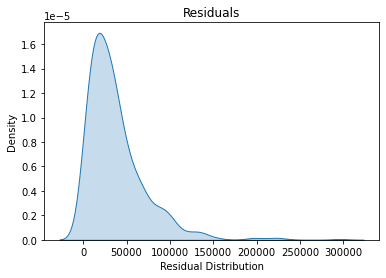

In [42]:
# Residuals Kernel Density Plot Random Forest

sns.kdeplot(x = resid, fill = True)
plt.xlabel("Residual Distribution")
plt.title("Residuals")
plt.show()

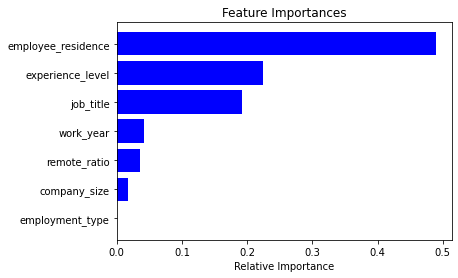

In [43]:
# Random Forest Feature Importances

importances = reg.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [50]:
""" Explain why we should not use Shap values because the interpreting the features in this case can be difficult. """

' Explain why we should not use Shap values because the interpreting the features in this case can be difficult. '

In [44]:
df_train = X_train.merge(y_train.to_frame(), left_index = True, right_index = True)
df_train.head()

,work_year,experience_level,employment_type,job_title,remote_ratio,employee_residence,company_size,salary_in_usd
1251,3,2,2,14,0,10,1,170000
2508,2,3,2,18,0,10,1,123000
1935,2,3,2,7,0,10,1,95000
398,3,2,2,10,0,10,1,90000
1902,2,3,2,16,2,10,1,164000


In [45]:
cat_cols = df_train[["work_year", "experience_level", "employment_type", "job_title", "remote_ratio", 
                       "employee_residence", "company_size"]].columns

for col in cat_cols:
    df_train[col] = df_train[col].astype("category")

In [48]:
# Linear Regression Fitting, Predicting (Not Performed Yet), and ANOVA

#lin_reg = smf.ols(formula = "salary_in_usd ~ experience_level + company_location + salary_currency + job_title + employee_residence + remote_ratio + work_year + company_size + employment_type", data = df_train).fit()
lin_reg = smf.ols(formula = "salary_in_usd ~ work_year + experience_level + employment_type + job_title + remote_ratio + employee_residence + company_size", data = df_train).fit()
#lin_reg.params
print(lin_reg.summary())

lin_reg_train_pred = lin_reg.predict(exog = X_train)
lin_reg_test_pred = lin_reg.predict(exog = X_test)

table = sm.stats.anova_lm(lin_reg, typ = 2) # Type 2 ANOVA DataFrame

print(table)


                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     51.21
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          9.85e-320
Time:                        14:05:05   Log-Likelihood:                -36579.
No. Observations:                3004   AIC:                         7.325e+04
Df Residuals:                    2960   BIC:                         7.351e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [49]:
# Linear Regression Evaluation

print("***************** TRAINING METRICS *****************")
print("MSE: " , np.round(metrics.mean_squared_error(y_train, lin_reg_train_pred), 2))
print("MAE: " , np.round(metrics.mean_absolute_error(y_train, lin_reg_train_pred), 2))
print("R-Squared: " , np.round(metrics.r2_score(y_train, lin_reg_train_pred), 2))

print("***************** TESTING METRICS *****************")
print("MSE: " , np.round(metrics.mean_squared_error(y_test, lin_reg_test_pred), 2))
print("MAE: " , np.round(metrics.mean_absolute_error(y_test, lin_reg_test_pred), 2))
print("R-Squared: " , np.round(metrics.r2_score(y_test, lin_reg_test_pred), 2))

***************** TRAINING METRICS *****************
MSE:  2208120635.48
MAE:  35527.76
R-Squared:  0.43
***************** TESTING METRICS *****************
MSE:  2593816109.99
MAE:  37618.29
R-Squared:  0.42


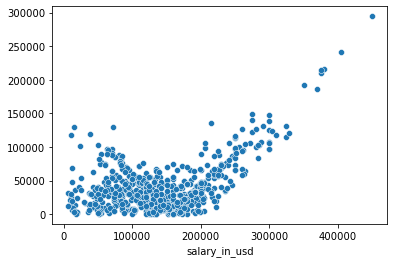

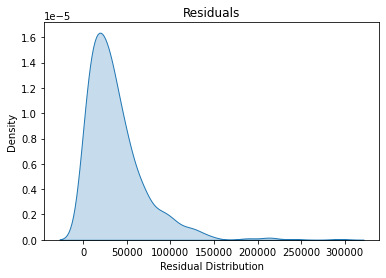

In [50]:
residuals = abs(y_test - lin_reg_test_pred)

sns.scatterplot(x = y_test, y = residuals)
plt.show()
# Residuals Kernel Density Plot Random Forest

sns.kdeplot(x = residuals, fill = True)
plt.xlabel("Residual Distribution")
plt.title("Residuals")
plt.show()